# Machine Learning

## Linear and logistic regression

Linear and logistic regressions are the two methods that can be used to linearly predict a target value and target class respectively.

Let's name X(i) the ith sample (it is actually a row vector of numerical features) and Y(i) its target. The goal of linear regression is to  nd a good weight (column) vector W, which is better at approximating the target value when multiplied by the observation vector, that is, X(i) * W ≈ Y(i) (note that this is a dot product). W should be the same, and the best, for every observation. W can be easily found with the help of a matrix inversion (or, more likely, a pseudo-inversion, which is a computationally ef cient way) and a dot product.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print (boston.data.shape)
print (type(boston))
print (type(boston.data))
print (type(boston.target))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)

(506, 13)
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [2]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print ("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 3.8429092204444983


In [3]:
%timeit regr.fit(X_train, Y_train) 

326 µs ± 7.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Logistic regression is a classifier and not a regressor. It must be used in classification problems where you are dealing with only two classes (binary classi cation). Typically, target labels are Boolean, that is ,they have values as either True/False or 0/1 (indicating the presence or absence of the expected outcome).

In [4]:
import numpy as np
avg_price_house = np.average(boston.target)
high_priced_idx = (Y_train >= avg_price_house)
Y_train[high_priced_idx] = 1
Y_train[np.logical_not(high_priced_idx)] = 0
Y_train = Y_train.astype(np.int8)
high_priced_idx = (Y_test >= avg_price_house)
Y_test[high_priced_idx] = 1
Y_test[np.logical_not(high_priced_idx)] = 0
Y_test = Y_test.astype(np.int8)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=2300)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        61
           1       0.85      0.71      0.77        41

    accuracy                           0.83       102
   macro avg       0.84      0.81      0.82       102
weighted avg       0.84      0.83      0.83       102



/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
%timeit clf.fit(X_train, Y_train)

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

414 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Naive Bayes

Naive Bayes is a very common classifier used for probabilistic multiclass classification. Given the feature vector, it uses the Bayes rule to predict the probability of each class. It's often applied to text classification since it's very effective with large and fat data (with many features) with a consistent a priori probability.

There are three kinds of Naive Bayes classifiers; each of them has strong assumptions (hypotheses) about the features. If you're dealing with real/continuous data, the Gaussian Naive Bayes classifier assumes that features are generated from a Gaussian process (that is, they are normally distributed). Alternatively, if you're dealing with an event model where events can be modelled with a multinomial distribution (in this case, features are counters or frequencies), you need to use the Multinomial Naive Bayes classifier. Finally, if all your features are independent and Boolean, and it is safe to assume that they're the realization of a Bernullian process, you can use the Bernoulli Naive Bayes classifier.

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [10]:
%timeit clf.fit(X_train, Y_train)

367 µs ± 21.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## K-nearest neighbours

K-Nearest Neighbors, or simply kNN, belongs to the class of instance-based learning, also known as lazy classifiers. It's one of the simplest classification methods because the classification is done by just looking at the K closest examples in the training set (in terms of Euclidean distance or some other kind of distance) in the case that we want to classify. Then, given the K similar examples, the most popular target (majority voting) is chosen as the classification label. Two parameters are mandatory for this algorithm: the neighborhood cardinality (K) and the measure to evaluate the similarity (although the Euclidean distance, or L2, is the most used and is the default parameter for most implementations).

kNN is great for small datasets, but it's de nitely not the algorithm you would use when dealing with big data.

In [11]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
mnist = fetch_openml("mnist_784")
type(mnist)

In [ ]:
mnist.data, mnist.target = shuffle(mnist.data, mnist.target)

In [ ]:
# We reduce the dataset size, otherwise it'll take too much time to run
mnist.data = mnist.data[:1000]
mnist.target = mnist.target[:1000]

X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.8, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN: K=3, default measure of distance (euclidean)
clf = KNeighborsClassifier(3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

In [ ]:
%timeit clf.fit(X_train, Y_train)

In [ ]:
%timeit clf.predict(X_test)

## Advanced non linear algorithms

Support Vector Machine (SVM) is a powerful and advanced supervised learning technique for classi cation and regression that can automatically  t linear and nonlinear models. Scikit-learn offers an implementation based on LIBSVM, a complete library of SVM classi cation and regression implementations, and LIBLINEAR, a library more scalable for linear classi cation of large datasets, especially the sparse text based ones. Both libraries have been developed at the National Taiwan University, and both have been written in C++ with a C API to interface with other languages. Both libraries have been extensively tested (being free, they have been used in other open source machine learning toolkits) and have been proven to be both fast and reliable. The C API explains well two tricky needs for them to operate better under the Python Scikit-learn:

• LIBSVM, when operating, needs to reserve some memory for kernel operations. The cache_size parameter is used to set the size of the kernel cache, which is speci ed in megabytes. Though the default value is 200, it is advisable to raise it to 500 or 1000, depending on your resources.

• They both expect C-ordered NumPy ndarray or SciPy sparse.csr_matrix (a row optimized sparse matrix kind), preferably with  oat64 dtype. If
the Python wrapper receives them under a different data structure, it will have to copy the data in a suitable format, slowing down the process and consuming more memory.

### SVM for classification

In [ ]:
import urllib
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with open('ijcnn1.bz2','wb') as W:
    W.write(urllib.request.urlopen(target_page).read())

In [ ]:
from sklearn.datasets import load_svmlight_file
import numpy as np
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
print (X_train.shape)
print (y_train.shape)
first_rows = 2500
X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]

In [ ]:
# RBF stands for Radial Basis Function, which is an effective nonlinear function
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
hypothesis = SVC(kernel='rbf', degree=2, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("SVC with rbf kernel -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

In [ ]:
import urllib
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2'
with open('poker.bz2','wb') as W:
    W.write(urllib.request.urlopen(target_page).read())

In [ ]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('poker.bz2')
print (X_train.shape)
print (y_train.shape)
from sklearn.preprocessing import OneHotEncoder
hot_encoding = OneHotEncoder(sparse=True)
X_train = hot_encoding.fit_transform(X_train.toarray())
print (y_train)

In [ ]:
# standard SVC won't perform with more than 10,000 observations; due to the growing cubic complexity, 
# LinearSVC can instead scale linearly
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
hypothesis = LinearSVC(dual=False)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print ("LinearSVC -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

### SVM for regression

In [ ]:
import urllib
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file(urllib.request.urlopen(target_page))
from sklearn.preprocessing import scale
first_rows = 2000
X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.0

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
hypothesis = SVR()

scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
print ("SVR -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

### Tuning SVM

In [20]:
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
hypothesis = SVC(kernel='rbf', random_state=101)
search_dict = {'degree':[2,3], 'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
search_func = RandomizedSearchCV(estimator=hypothesis, param_distributions=search_dict, n_iter=30, scoring='accuracy', 	n_jobs=-1, iid=True, refit=True, cv=5, random_state=101)
search_func.fit(X_train, y_train)
print('Best parameters %s' % search_func.best_params_)
print('Cross validation accuracy: mean = %0.3f' % search_func.best_score_)

Best parameters {'gamma': 0.1, 'degree': 3, 'C': 100}
Cross validation accuracy: mean = 0.998


/Users/jinzhugao/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


## Ensemble strategies

In [22]:
from sklearn.datasets import fetch_covtype
covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
print (covertype_dataset.DESCR)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

### Bagging with weak ensembles

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
hypothesis = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), max_samples=0.7, max_features=0.7, n_estimators=100)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print("BaggingClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

BaggingClassifier -> cross validation accuracy: mean = 0.794 std = 0.003


### Random subspaces and random patches

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print("RandomForestClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accuracy: mean = 0.811 std = 0.006


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
hypothesis = ExtraTreesClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print("ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> cross validation accuracy: mean = 0.822 std = 0.006


In [34]:
import urllib.request
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file(urllib.request.urlopen(target_page))
from sklearn.preprocessing import scale
first_rows = 2000

In [38]:
X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.
from sklearn.ensemble import RandomForestRegressor
hypothesis = RandomForestRegressor(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='mean_absolute_error', n_jobs=-1)
print("RandomForestClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accuracy: mean = -4.656 std = 0.513


### Sequences of models: Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
hypothesis = AdaBoostClassifier(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print("Adaboost -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

Adaboost -> cross validation accuracy: mean = 0.622 std = 0.006


### Gradient tree boosting (GTB)

In [37]:
import urllib.request
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2'
with open('poker.bz2','wb') as W:
    W.write(urllib.request.urlopen(target_page).read())
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('poker.bz2')
from sklearn.preprocessing import OneHotEncoder
hot_encoding = OneHotEncoder(sparse=True)
X_train = hot_encoding.fit_transform(X_train.toarray()).toarray()[:2500,:]
y_train = y_train[:2500]

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
hypothesis = GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("GradientBoostingClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

GradientBoostingClassifier -> cross validation accuracy: mean = 0.790 std = 0.029


## Dealing with big data

### Creating some big datasets as examples

In [40]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
newsgroups_dataset = fetch_20newsgroups(shuffle=True, remove=('headers', 'footers', 'quotes'), random_state=6)
print('Posts inside the data: %s' % np.shape(newsgroups_dataset.data))
print('Average number of words for post: %0.0f' % np.mean([len(text.split(' ')) for text in newsgroups_dataset.data]))

/Users/jinzhugao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Posts inside the data: 11314
Average number of words for post: 206


In [42]:
# Attention this may take a while
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10**5, n_features=5, n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('huge_dataset_10__5.csv', D, delimiter=",") # the saved file should be around 14,6 MB
del(D, X, y)
X,y = make_classification(n_samples=10**6, n_features=5, n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('huge_dataset_10__6.csv', D, delimiter=",") # the saved file should be around 146 MB
del(D, X, y)
X,y = make_classification(n_samples=10**7, n_features=5, n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('huge_dataset_10__7.csv', D, delimiter=",") # the saved file should be around 1,46 GB
del(D, X, y)

### Scalability with volume

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
streaming = pd.read_csv('huge_dataset_10__7.csv', header=None, chunksize=10000)
learner = SGDClassifier(loss='log')
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
cumulative_accuracy = list()
for n,chunk in enumerate(streaming):
    if n == 0:
            minmax_scaler.fit(chunk.loc[:,1:].values)
    X = minmax_scaler.transform(chunk.loc[:,1:].values)
    X[X>1] = 1
    X[X<0] = 0  
    y = chunk.loc[:,0]
    if n > 8 :
        cumulative_accuracy.append(learner.score(X,y))
    learner.partial_fit(X,y,classes=np.unique(y))
print('Progressive validation mean accuracy %0.3f' % np.mean(cumulative_accuracy))

Progressive validation mean accuracy 0.708


## Keeping up with velocity

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd
from datetime import datetime
classifiers  = {
'SGDClassifier hinge loss' : SGDClassifier(loss='hinge', random_state=101),
'SGDClassifier log loss' : SGDClassifier(loss='log', random_state=101),
'Perceptron' : Perceptron(random_state=101),
'BernoulliNB' : BernoulliNB(),
'PassiveAggressiveClassifier' : PassiveAggressiveClassifier(random_state=101)
}
huge_dataset = 'huge_dataset_10__6.csv'
for algorithm in classifiers:
    start = datetime.now()
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
    streaming = pd.read_csv(huge_dataset, header=None, chunksize=100)
    learner = classifiers[algorithm]
    cumulative_accuracy = list()
    for n,chunk in enumerate(streaming):
        y = chunk.loc[:,0]
        X = chunk.loc[:,1:]
        if n > 50 :
            cumulative_accuracy.append(learner.score(X,y))
        learner.partial_fit(X,y,classes=np.unique(y))
    elapsed_time = datetime.now() - start
    print(algorithm + ' : mean accuracy %0.3f in %s secs' % (np.mean(cumulative_accuracy),elapsed_time.total_seconds()))

SGDClassifier hinge loss : mean accuracy 0.748 in 64.965034 secs
SGDClassifier log loss : mean accuracy 0.740 in 64.503464 secs
Perceptron : mean accuracy 0.676 in 63.309852 secs
BernoulliNB : mean accuracy 0.650 in 67.015273 secs
PassiveAggressiveClassifier : mean accuracy 0.715 in 64.868006 secs


### Dealing with variety

In [48]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import HashingVectorizer
def streaming():
    for response, item in zip(newsgroups_dataset.target, newsgroups_dataset.data):
        yield response, item
hashing_trick = HashingVectorizer(stop_words='english', norm = 'l2', decode_error = 'ignore')
learner = SGDClassifier(random_state=101)
texts = list()
targets = list()
for n,(target, text) in enumerate(streaming()):
    texts.append(text)
    targets.append(target)
    if n % 1000 == 0 and n >0:
        learning_chunk = hashing_trick.transform(texts)
        if n > 1000:
            last_validation_score = learner.score(learning_chunk, targets),
        learner.partial_fit(learning_chunk, targets, classes=[k for k in range(20)])
        texts, targets = list(), list()
print('Last validation score: %0.3f' % last_validation_score)

Last validation score: 0.718


In [59]:
New_text = ['A 2014 red Toyota Prius v Five with fewer than 14K miles. Powered by a reliable 1.8L four cylinder hybrid engine that averages 44mpg in the city and 40mpg on the highway.']
text_vector = hashing_trick.transform(New_text)
print(np.shape(text_vector), type(text_vector))
print('Predicted newsgroup: %s' % newsgroups_dataset.target_names[learner.predict(text_vector)[0]])

(1, 1048576) <class 'scipy.sparse.csr.csr_matrix'>
Predicted newsgroup: rec.autos


## A peek of NLP

### Word tokenisation

In [61]:
my_text = "The sexy job in the next 10 years will be statisticians. People think I'm joking, but who would've guessed that computer engineers would've been the sexy job of the 1990s?"
simple_tokens = my_text.split(' ')
print(simple_tokens)

['The', 'sexy', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians.', 'People', 'think', "I'm", 'joking,', 'but', 'who', "would've", 'guessed', 'that', 'computer', 'engineers', "would've", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s?']


Executing this or other nltk package calls, 
In case of an error saying: “Resource u'tokenizers/punkt/english.pickle' not found.”,
just write on your console: nltk.download() 
and select to download everything or just to browse for the missing resource that triggered the warning.

In [67]:
import nltk
# nltk.download('punkt') if Package punkt has not been downloaded
nltk_tokens = nltk.word_tokenize(my_text)
print(nltk_tokens)

['The', 'sexy', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians', '.', 'People', 'think', 'I', "'m", 'joking', ',', 'but', 'who', 'would', "'ve", 'guessed', 'that', 'computer', 'engineers', 'would', "'ve", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s', '?']


### Stemming

In [68]:
from nltk.stem import *
stemmer = LancasterStemmer()
print([stemmer.stem(word) for word in nltk_tokens])

['the', 'sexy', 'job', 'in', 'the', 'next', '10', 'year', 'wil', 'be', 'stat', '.', 'peopl', 'think', 'i', "'m", 'jok', ',', 'but', 'who', 'would', "'ve", 'guess', 'that', 'comput', 'engin', 'would', "'ve", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s', '?']


### Word Tagging

In [71]:
import nltk
# nltk.download('averaged_perceptron_tagger')
print(nltk.pos_tag(nltk_tokens))

[('The', 'DT'), ('sexy', 'JJ'), ('job', 'NN'), ('in', 'IN'), ('the', 'DT'), ('next', 'JJ'), ('10', 'CD'), ('years', 'NNS'), ('will', 'MD'), ('be', 'VB'), ('statisticians', 'NNS'), ('.', '.'), ('People', 'NNS'), ('think', 'VBP'), ('I', 'PRP'), ("'m", 'VBP'), ('joking', 'VBG'), (',', ','), ('but', 'CC'), ('who', 'WP'), ('would', 'MD'), ("'ve", 'VBP'), ('guessed', 'VBN'), ('that', 'IN'), ('computer', 'NN'), ('engineers', 'NNS'), ('would', 'MD'), ("'ve", 'VBP'), ('been', 'VBN'), ('the', 'DT'), ('sexy', 'JJ'), ('job', 'NN'), ('of', 'IN'), ('the', 'DT'), ('1990s', 'CD'), ('?', '.')]


### Named Entity Recognition

In [75]:
import nltk
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
text = "Elvis Aaron Presley was an American singer and actor. Born in Tupelo, Mississippi, when Presley was 13 years old he and his family relocated to Memphis, Tennessee."
chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text)))
print(chunks)

(S
  (PERSON Elvis/NNP)
  (PERSON Aaron/NNP Presley/NNP)
  was/VBD
  an/DT
  (GPE American/JJ)
  singer/NN
  and/CC
  actor/NN
  ./.
  Born/VBN
  in/IN
  (GPE Tupelo/NNP)
  ,/,
  (GPE Mississippi/NNP)
  ,/,
  when/WRB
  (PERSON Presley/NNP)
  was/VBD
  13/CD
  years/NNS
  old/JJ
  he/PRP
  and/CC
  his/PRP$
  family/NN
  relocated/VBD
  to/TO
  (GPE Memphis/NNP)
  ,/,
  (GPE Tennessee/NNP)
  ./.)


### Stopwords

In [76]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
print(stop_words)

frozenset({'amongst', 'go', 'con', 'thus', 'nobody', 'where', 'un', 'never', 'toward', 'behind', 'mine', 'often', 'besides', 'whenever', 'back', 'due', 'detail', 'those', 'i', 'nowhere', 'sixty', 'some', 'whereas', 'yet', 'ourselves', 'that', 'less', 'out', 'wherever', 'against', 'please', 'thence', 'either', 'everything', 'few', 'eight', 'etc', 'someone', 'next', 'cant', 'amoungst', 'twelve', 'or', 'bottom', 'not', 'nothing', 'many', 'as', 'them', 'first', 'you', 'about', 'whose', 'us', 'indeed', 'they', 'below', 'de', 'give', 'was', 'whoever', 'see', 'throughout', 'our', 'made', 'twenty', 'whereafter', 'only', 'much', 'done', 'sometime', 'via', 'always', 'again', 'least', 'no', 'yours', 'because', 'such', 'fifteen', 'fire', 'ltd', 'would', 'everyone', 'most', 'whatever', 'though', 'any', 'ours', 'cannot', 'even', 'six', 'anyone', 'is', 'will', 'also', 'three', 'everywhere', 'neither', 'may', 'around', 'while', 'fill', 'co', 'becoming', 'my', 'full', 'with', 'between', 'others', 'it',

### A complete data science example: text classification

In [77]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'sci.space']
to_remove = ('headers', 'footers', 'quotes')
twenty_sci_news_train = fetch_20newsgroups(subset='train', remove=to_remove, categories=categories)
twenty_sci_news_test = fetch_20newsgroups(subset='test', remove=to_remove, categories=categories)

In [78]:
tf_vect = TfidfVectorizer()
X_train = tf_vect.fit_transform(twenty_sci_news_train.data)
X_test = tf_vect.transform(twenty_sci_news_test.data)
Y_train = twenty_sci_news_train.target
Y_test = twenty_sci_news_test.target

In [79]:
clf = SGDClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy=", accuracy_score(Y_test, Y_pred))

Accuracy= 0.9012658227848102


In [80]:
def clean_and_stem_text(text):
    tokens = nltk.word_tokenize(text.lower())
    clean_tokens = [word for word in tokens if word not in stop_words]
    stem_tokens = [stemmer.stem(token) for token in clean_tokens]
    return " ".join(stem_tokens)
cleaned_docs_train = [clean_and_stem_text(text) for text in twenty_sci_news_train.data]
cleaned_docs_test = [clean_and_stem_text(text) for text in twenty_sci_news_test.data]

In [81]:
X1_train = tf_vect.fit_transform(cleaned_docs_train)
X1_test = tf_vect.transform(cleaned_docs_test)
clf.fit(X1_train, Y_train)
Y1_pred = clf.predict(X1_test)
print("Accuracy=", accuracy_score(Y_test, Y1_pred))

Accuracy= 0.8873417721518987


## An overview of unsupervised learning

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [83]:
from sklearn import datasets
N_samples = 2000
dataset_1 = np.array(datasets.make_circles(n_samples=N_samples, noise=0.05, factor=0.3)[0])
dataset_2 = np.array(datasets.make_blobs(n_samples=N_samples, centers=4, cluster_std=0.4, random_state=0)[0])

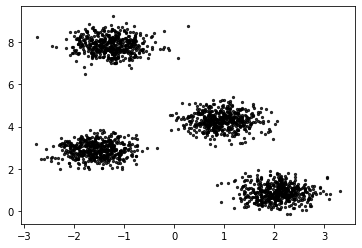

In [84]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c='k', alpha=0.8, s=5.0)
plt.show()

In [85]:
from sklearn.cluster import KMeans
K_dataset_1 = 2
km_1 = KMeans(n_clusters=K_dataset_1)
labels_1 = km_1.fit(dataset_1).labels_

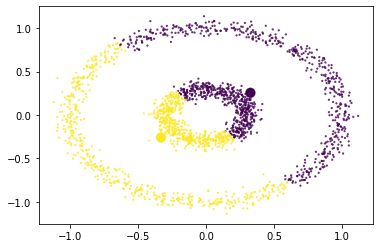

In [86]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha=0.8, s=5.0, lw = 0)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s=100, c=np.unique(labels_1), lw=0.2)
plt.show()

In [87]:
K_dataset_2 = 4
km_2 = KMeans(n_clusters=K_dataset_2)
labels_2 = km_2.fit(dataset_2).labels_

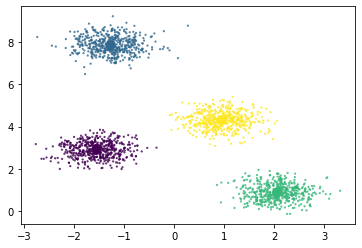

In [88]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha=0.8, s=5.0, lw = 0)
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], s=100, c=np.unique(labels_2), lw=0.2)
plt.show()

In [89]:
from sklearn.cluster import DBSCAN
dbs_1 = DBSCAN(eps=0.4)
labels_1 = dbs_1.fit(dataset_1).labels_

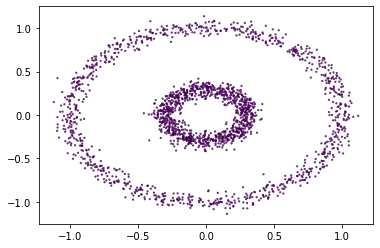

In [90]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha=0.8, s=5.0, lw = 0)
plt.show()

In [91]:
np.unique(labels_1)

array([0])

In [92]:
dbs_2 = DBSCAN(eps=0.5)
labels_2 = dbs_2.fit(dataset_2).labels_

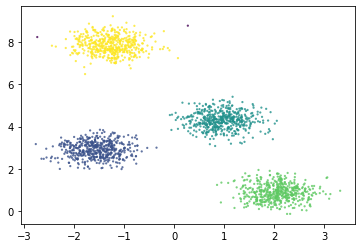

In [93]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha=0.8, s=5.0, lw = 0)
plt.show()

In [94]:
np.unique(labels_2)

array([-1,  0,  1,  2,  3])